## 信用卡欺诈检测

基于信用卡交易记录数据建立分类模型来预测哪些交易记录是异常的哪些是正常的。

### 任务流程：
* 加载数据，观察数据有什么问题
* 针对问题给出解决方案
* 数据集切分
* 评估方法对比
* 逻辑回归模型
* 建模结果分析
* 方案效果对比

### 主要解决问题：
（1）在此项目中，我们首选对数据进行了观察，发现了其中样本不均衡的问题，其实我们做任务工作之前都一定要先进行数据检查，看看数据有什么问题，针对这些问题来选择解决方案。

（2）这里我们提出了两种方法，下采样和过采样，两条路线来进行对比实验，任何实际问题来了之后，我们都不会一条路走到黑的，没有对比就没有伤害，通常都会得到一个基础模型，然后对各种方法进行对比，找到最合适的，所以在任务开始之前，一定得多动脑筋多一手准备，得到的结果才有可选择的余地。

（3）在建模之前，需要对数据进行各种预处理的操作，比如数据标准化，缺失值填充等，这些都是必要操作，由于数据本身已经给定了特征，此处我们还没有提到特征工程这个概念，后续实战中我们会逐步引入，其实数据预处理的工作是整个任务中最为最重也是最苦的一个阶段，数据处理的好不好对结果的影响是最大的。

（4）先选好评估方法，再进行建模。建模的目的就是为了得到结果，但是我们不可能一次就得到最好的结果，肯定要尝试很多次，所以一定得有一个合适的评估方法，可以用这些通用的，比如Recall，准确率等，也可以根据实际问题自己指定评估指标。

（5）选择合适的算法，这里我们使用的是逻辑回归，也详细分析了其中的细节，这是因为我们刚刚讲解完逻辑回归的原理就拿它来练手了，之后我们还会讲解其他算法，并不一定非要用逻辑回归来完成这个任务，其他算法可能效果会更好。但是有一点我希望大家能够理解就是在机器学习中并不是越复杂的算法越实用，恰恰相反，越简单的算法反而应用的越广泛。逻辑回归就是其中一个典型的代表了，简单实用，所以任何分类问题都可以把逻辑回归当做一个待比较的基础模型了。

（6）模型的调参也是很重要的，之前我们通过实验也发现了不同的参数可能会对结果产生较大的影响，这一步也是必须的，后续实战内容我们还会来强调调参的细节，这里就简单概述一下了。对于参数我建立大家在使用工具包的时候先看看其API文档，知道每一个参数的意义，再来实验选择合适的参数值。

（7）得到的结果一定要和实际任务结合在一起，有时候虽然得到的结果指标还不错，但是实际应用却成了问题，所以测试环节也是必不可少的。到此，这个项目就给大家介绍到这里了，在实践中学习才能成长的更快，建议大家一定使用提供的Notebook代码文件来自己完成一遍上述操作。

## 导入我们的工具包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 数据读取

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 数据标签分布

In [3]:
# 查看Class那一列的数据分布，可以看到数据分布极度不平衡
count_classes = pd.value_counts(data['Class'])
count_classes

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

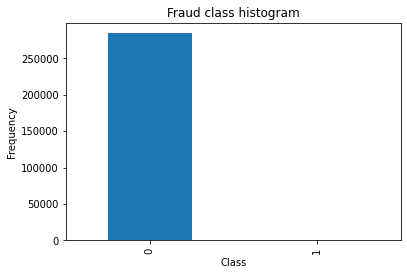

In [4]:
# 注意pd.value_counts()方法的使用，返回的Series对象可以调用plot()方法直接绘图
count_classes.plot(kind='bar')

plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

## 数据标准化处理

In [5]:
from sklearn.preprocessing import StandardScaler

# 使用Z-score算法对Amount那一列进行标准化，即先减均值再除以标准差
# 注意.values返回的是一个一维数组，使用reshape(-1,1)可以将其转换成列向量(列向量是二维数组)
# 由于V1到V28已经进行过标准化，因此这里只标准化了Amount这一列，但实际上应该对所有列都进行标准化
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# 删除没有用的列
data = data.drop(['Time','Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## 下采样(欠采样)方案

下采样(欠采样)就是从多数集中选出一部分数据，与少数集组合成一个新的数据集

In [6]:
# 查看异常样本的行索引
data[data.Class == 1].index

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)

In [7]:
# 这里的下采样(欠采样)就是从多数集中选出一部分数据，与少数集组合成一个新的数据集，
# 这样数据的分布就会平衡


# 得到所有Class为1的行的数量
number_records_fraud = len(data[data.Class == 1]) 

# 得到所有异常样本(Class为1)的行索引，使用data.Class可以直接获取Class那一列
fraud_indices = data[data.Class == 1].index

# 得到所有正常样本的行索引
normal_indices = data[data.Class == 0].index

# 在正常样本中随机采样出与异常样本相同个样本(具体用法查API)，replace参数表示是否可以重复选择一个元素
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)

# 把正常样本和异常样本的索引合并
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# 根据索引，得到所有下采样的样本，此时样本的分布就已经平衡
under_sample_data = data.iloc[under_sample_indices,:]

# X是每个样本的特征(即除了标签那一列，其他列都是特征)，y是每个样本的标签
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# 下采样 样本比例
print("正常样本所占整体比例: ", len(under_sample_data[under_sample_data.Class == 0]) / len(under_sample_data))
print("异常样本所占整体比例: ", len(under_sample_data[under_sample_data.Class == 1]) / len(under_sample_data))
print("下采样策略总体样本数量: ", len(under_sample_data))

正常样本所占整体比例:  0.5
异常样本所占整体比例:  0.5
下采样策略总体样本数量:  984


## 数据集划分

In [8]:
from sklearn.model_selection import train_test_split

# 这里使用了布尔索引，用于选取列
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

data.columns != 'Class'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True])

In [9]:
# 对原始数据集进行划分(即分布不平衡的那个数据集)
# test_size是测试集的比例，random_state是随机数种子
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state = 0)

print("原始训练集包含样本数量: ", len(X_train))
print("原始测试集包含样本数量: ", len(X_test))
print("原始样本总数: ", len(X_train) + len(X_test))

# 对下采样数据集进行划分
# 注意这里的X_test_undersample和y_test_undersample是不能用来作为模型的测试数据的
# 因为下采样的数据集中正常样本和异常样本的比例是接近1:1的，然而实际的数据集中这两类样本数量的比例
# 并不是1:1，因此在对模型进行测试的时候需要使用上面的X_test和y_test进行测试，不能使用
# X_test_undersample和y_test_undersample，否则模型的准确率会比实际偏高
# 这里把X_test_undersample和y_test_undersample划分出来的目的是为了与实际情况做对比
# 这行代码过长，使用了续行符
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = \
    train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state = 0)

print("")
print("下采样训练集包含样本数量: ", len(X_train_undersample))
print("下采样测试集包含样本数量: ", len(X_test_undersample))
print("下采样样本总数: ", len(X_train_undersample)+len(X_test_undersample))

原始训练集包含样本数量:  199364
原始测试集包含样本数量:  85443
原始样本总数:  284807

下采样训练集包含样本数量:  688
下采样测试集包含样本数量:  296
下采样样本总数:  984


In [10]:
# 注意这是一个二维数组(列向量)，而不是一维数组
print(type(y_train_undersample))
y_train_undersample.shape

<class 'pandas.core.frame.DataFrame'>


(688, 1)

## 逻辑回归模型

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report 
from sklearn.model_selection import cross_val_predict

In [12]:
# 手动实现交叉验证，实际上可以使用sklearn中的API
# x_train_data, y_train_data都是DataFrame对象
def printing_Kfold_scores(x_train_data, y_train_data):
    
    # K折交叉验证，shuffle表示是否在划分前对数据进行洗牌
    fold = KFold(5, shuffle=False) 

    # 定义不同的正则化惩罚力度，即λ的大小
    c_param_range = [0.01, 0.1, 1, 10, 100]
    
    # 创建一个用于保存结果的表格, index和columns参数分别定义行索引和列索引
    results_table = pd.DataFrame(index = range(len(c_param_range)), 
                                 columns = ['C_parameter','Mean recall score'])
    
    results_table['C_parameter'] = c_param_range # 赋值
    
    j = 0 # j用于记录索引，下面会用到
    
    # 遍历不同的参数
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('正则化惩罚力度: ', c_param)
        print('-------------------------------------------')
        print('')

        # 用于保存交叉验证过程中得到的召回率
        recall_accs = []
        
        # fold.split()方法返回的是很多个二元组，二元组中的数据类型是列表，
        # 第一个列表是训练集中样本的下标，第二个列表是验证集中样本的下标
        
        # iteration是枚举的下标，默认从0开始，indices就是fold.split()方法的返回的二元组
        # k-fold表示K折的交叉验证，这里会得到两个索引集合: 
        # 训练集 = indices[0], 验证集 = indices[1]
        
        # 这个for循环在执行交叉验证，循环次数就是K折大小
        for iteration, indices in enumerate(fold.split(x_train_data)): 

            # 指定算法模型，并且给定参数
            lr = LogisticRegression(C = c_param, penalty = 'l2')

            # 训练模型，注意索引不要给错了，训练的时候一定传入的是训练集
            # indices[0]就是训练集中各样本的下标，第二个维度全取，即特征全取
            
            # 注意y_train_data是一个DataFrame对象，因此得到的数据是n * 1形状，
            # 而fit()方法对y参数的形状要求是一维数组，
            # 因此需要调用扁平化操作将其变成一维数组(调用values属性取对应的numpy数组)
            lr.fit(x_train_data.iloc[indices[0], :].values, 
                   y_train_data.iloc[indices[0], :].values.ravel())

            # 建立好模型后，预测模型结果，这里用的就是验证集，索引为1
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1], :].values)

            # 使用sklearn提供recall_score计算召回率
            # recall_score需要传入预测值和真实值
            # 返回值是一个浮点数，即计算的召回率
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values, 
                                      y_pred_undersample)
            
            # 一会还要算平均，所以把每一步的结果都保存
            recall_accs.append(recall_acc)
            
            print('Iteration ', iteration,': 召回率 = ', recall_acc)
        
        # 当执行完所有的交叉验证后，计算所有召回率的平均值
        results_table.loc[j, 'Mean recall score'] = np.mean(recall_accs)
        j += 1
        
        print('')
        print('平均召回率 ', np.mean(recall_accs))
        print('')
        
    # 找到最好的参数，哪一个Recall高，自然就是最好的了
    # 转换成32位浮点数，默认是64位，idxmax()返回的是最大值的行索引
    best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']
    
    # 打印最好的结果
    print('*********************************************************************************')
    print('效果最好的模型所选参数 = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [13]:
X_train_undersample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
6870,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,-6.999907,...,0.360924,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,-0.349231
168766,-0.694843,-1.561031,0.366601,-0.002357,1.782257,-0.921492,-0.371279,-0.000760,0.451934,0.051365,...,0.540447,-0.002507,-0.272468,1.045941,0.749972,-2.519590,-0.226091,0.105807,0.183571,-0.052094
54332,0.603823,-0.800616,1.066029,1.469615,-1.002810,0.506706,-0.388471,0.253116,0.348466,-0.078807,...,0.352292,0.366270,0.704943,-0.262349,0.263899,0.301695,-0.269481,0.038291,0.066936,0.626302
214775,-0.395582,-0.751792,-1.984666,-0.203459,1.903967,-1.430289,-0.076548,-0.992260,0.756307,0.217630,...,-1.027716,1.377515,2.151787,0.189225,0.772943,-0.872443,-0.200612,0.356856,0.032113,-0.350471
149145,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,3.353525,0.369936,...,-2.140874,10.005998,-2.454964,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,-0.325283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35861,-0.824019,0.415744,2.337084,-0.476442,0.039631,0.662213,0.031629,0.427124,0.474946,-1.026717,...,-0.143169,-0.075681,-0.162744,-0.315374,-0.773780,0.265300,0.323123,0.038531,0.055159,-0.307251
79536,-0.264869,3.386140,-3.454997,4.367629,3.336060,-2.053918,0.256890,-2.957235,-2.855797,-2.808456,...,0.482513,-1.394504,-0.166029,-1.452081,-0.251815,1.243461,0.452787,0.132218,0.424599,-0.349231
18202,1.055289,0.175425,1.487191,2.670982,-0.610912,0.630311,-0.606268,0.291512,0.082534,0.438415,...,-0.156642,-0.048509,0.024591,0.061028,0.080428,0.224766,-0.015948,0.057668,0.035162,-0.295457
252979,-1.061943,-0.390639,1.491436,-0.846951,0.190512,-0.154870,0.645208,0.008653,0.179483,-0.325478,...,0.580289,0.290645,0.701698,0.093921,-0.317560,-0.063440,0.646382,0.074650,-0.030191,0.276069


## 交叉验证与不同参数结果

In [14]:
# 使用下采样的数据集进行交叉验证
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.821917808219178
Iteration  1 : 召回率 =  0.8493150684931506
Iteration  2 : 召回率 =  0.9152542372881356
Iteration  3 : 召回率 =  0.918918918918919
Iteration  4 : 召回率 =  0.8787878787878788

平均召回率  0.8768387823414523

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.8493150684931506
Iteration  1 : 召回率 =  0.8767123287671232
Iteration  2 : 召回率 =  0.9322033898305084
Iteration  3 : 召回率 =  0.9459459459459459
Iteration  4 : 召回率 =  0.8939393939393939

平均召回率  0.8996232253952245

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.8493150684931506
Iteration  1 : 召回率 =  0.8904109589041096
Iteration  2 : 召回率 =  0.9491525423728814
Iteration  3 : 召回率 =  0.9459459459459459
Iteration  4 : 召回率 =  0.9242424242424242

平均召回率  0.9118133879917

## 混淆矩阵

In [15]:
# 绘制混淆矩阵的模板代码，这部分代码直接当成模板就好

# cm是需要传入的confusion matrix，是sklearn工具包中的confusion_matrix()对象
# classes是列表类型，表示每个类别的标签
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    import itertools
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 下采样方案在构造的测试集中的结果

召回率:  0.9047619047619048
精确率:  0.9432624113475178


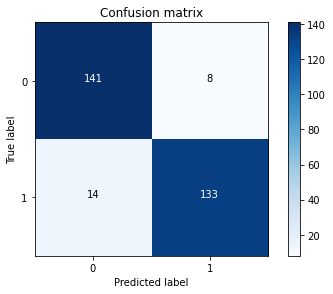

In [16]:
# 使用最好的参数创建模型对象
lr = LogisticRegression(C = best_c, penalty = 'l2')

# 使用下采样数据集训练模型
lr.fit(X_train_undersample, y_train_undersample.values.ravel())

# 注意这里拿X_test_undersample作为测试数据，只是为了做对比，
# 实际上应该使用X_test作为测试集
y_pred_undersample = lr.predict(X_test_undersample.values)

# 使用sklea提供的confusion_matrix()生成混淆矩阵
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)

print("召回率: ", cnf_matrix[1,1] / (cnf_matrix[1,0] + cnf_matrix[1,1]))
print("精确率: ", cnf_matrix[1,1] / (cnf_matrix[0,1] + cnf_matrix[1,1]))

# 绘制混淆矩阵
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

从结果上看，模型在下采样数据集中的准确率似乎不错...

## 下采样方案在原始测试集中的结果

召回率:  0.9115646258503401
精确率:  0.05171748359706677


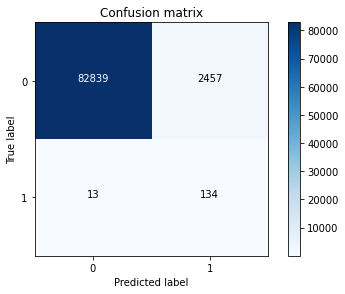

In [17]:
lr = LogisticRegression(C = best_c, penalty = 'l2')

lr.fit(X_train_undersample, y_train_undersample.values.ravel())

# 使用真正的测试集进行预测
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred)

# 可以看到召回率和之前相差不大，但是精确率(即预测正确的正类占所有预测为正的比例)几乎为0
print("召回率: ", cnf_matrix[1,1] / (cnf_matrix[1,0] + cnf_matrix[1,1]))
print("精确率: ", cnf_matrix[1,1] / (cnf_matrix[0,1] + cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

## 阈值对结果的影响

[[9.53e-01 4.74e-02]
 [4.52e-01 5.48e-01]
 [7.71e-11 1.00e+00]
 [9.89e-01 1.11e-02]
 [2.19e-02 9.78e-01]
 [9.71e-12 1.00e+00]
 [3.69e-03 9.96e-01]
 [9.95e-01 5.41e-03]
 [7.10e-01 2.90e-01]
 [4.32e-01 5.68e-01]]
给定阈值为: 0.1 时测试集召回率:  0.9659863945578231
给定阈值为: 0.2 时测试集召回率:  0.9455782312925171
给定阈值为: 0.3 时测试集召回率:  0.9319727891156463
给定阈值为: 0.4 时测试集召回率:  0.9115646258503401
给定阈值为: 0.5 时测试集召回率:  0.9047619047619048
给定阈值为: 0.6 时测试集召回率:  0.891156462585034
给定阈值为: 0.7 时测试集召回率:  0.8775510204081632
给定阈值为: 0.8 时测试集召回率:  0.8571428571428571
给定阈值为: 0.9 时测试集召回率:  0.8503401360544217


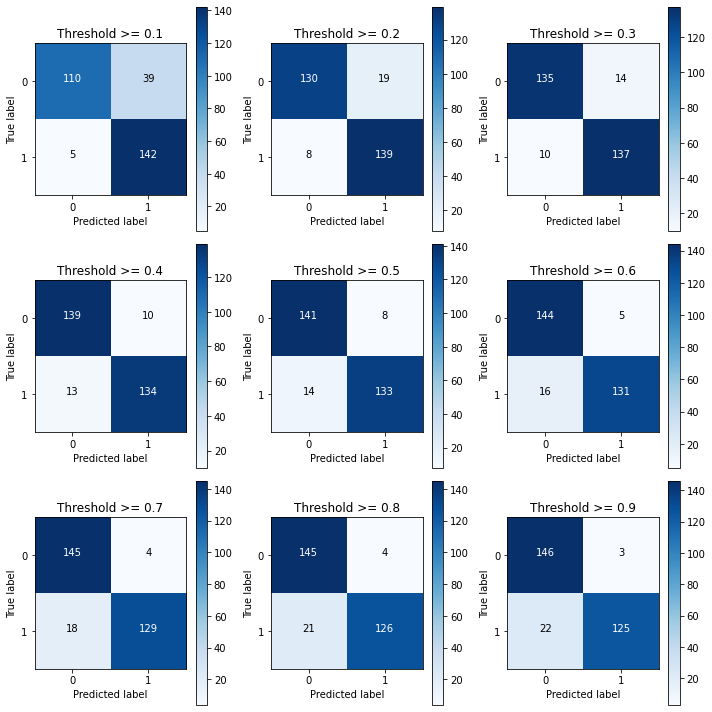

In [18]:
# 用选择好的参数进行建模
lr = LogisticRegression(C = best_c, penalty = 'l2')

# 设置打印的精度为两位小数
np.set_printoptions(precision=2)

# 训练模型，还是用下采样的数据集
lr.fit(X_train_undersample, y_train_undersample.values.ravel())

# 这里不使用predict()方法，而是使用predict_proba()方法得到预测结果的概率值
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

# 打印前十个样本预测的概率
print(y_pred_undersample_proba[:10])

# 指定不同的阈值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10, 10))
j = 1

# 用混淆矩阵来进行展示
for i in thresholds:
    
    # 如果预测为标签1的概率大于阈值i，就预测为True，否则就是False
    # 这里返回的是一个布尔数组，即False表示0，True表示1
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    
    print("给定阈值为:", i, "时测试集召回率: ", 
          cnf_matrix[1,1] / (cnf_matrix[1,0] + cnf_matrix[1,1]))

    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s'%i)

不同的阈值有不同的召回率，但是怎么权衡召回率和精确率，这个得看具体的业务

## SMOTE过采样

In [19]:
from imblearn.over_sampling import SMOTE

# 重新读入数据
credit_cards = pd.read_csv('creditcard.csv')

# 注意Amount这一列没有标准化
credit_cards["Amount"]

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [20]:
# 数据标准化
credit_cards["Amount"] = \
    StandardScaler().fit_transform(credit_cards["Amount"].values.reshape(-1, 1))

credit_cards["Amount"]

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [21]:
columns = credit_cards.columns
print(columns)

features = credit_cards.drop(["Class", "Time"], axis=1)
labels = credit_cards['Class'] 

print(features.shape)
print(labels.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 29)
(284807,)


In [22]:
# 划分数据集
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=0)

基于SMOTE算法来进行样本生成，这样正例和负例样本数量就是一致的了

In [23]:
oversampler = SMOTE(random_state=0)

# 根据原始数据进行过采样，默认情况下构造出的数据中正例和负例一样多
os_features, os_labels = oversampler.fit_resample(features_train, labels_train)

print(os_features.shape)
print(type(os_features))

print(os_labels.shape)
print(type(os_labels))

(398038, 29)
<class 'pandas.core.frame.DataFrame'>
(398038,)
<class 'pandas.core.series.Series'>


In [24]:
# 训练集样本数量
len(os_labels[os_labels==1])

199019

In [25]:
# 选择最好的惩罚力度, 注意os_labels是Series类型，需要转换成DataFrame类型
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features, os_labels)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.9285714285714286
Iteration  1 : 召回率 =  0.912
Iteration  2 : 召回率 =  0.9134294385432473
Iteration  3 : 召回率 =  0.897973796274197
Iteration  4 : 召回率 =  0.8983129624279272

平均召回率  0.91005752516336

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.9285714285714286
Iteration  1 : 召回率 =  0.92
Iteration  2 : 召回率 =  0.9151745068285281
Iteration  3 : 召回率 =  0.8989536096071954
Iteration  4 : 召回率 =  0.8990541032823747

平均召回率  0.9123507296579053

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.9285714285714286
Iteration  1 : 召回率 =  0.92
Iteration  2 : 召回率 =  0.9155538694992412
Iteration  3 : 召回率 =  0.8992550906327333
Iteration  4 : 召回率 =  0.8992927757609256

平均召回率  0.9125346328928657

-------------------------------------

召回率:  0.9183673469387755
精确率:  0.06037567084078712


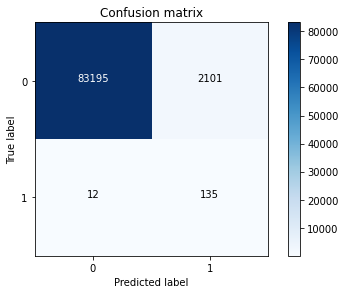

In [26]:
# 这回使用过采样的数据集训练模型
lr = LogisticRegression(C = best_c, penalty = 'l2')

lr.fit(os_features, os_labels.values.ravel())

# 但是预测时使用原始的测试集
y_pred = lr.predict(features_test.values)

# 计算混淆矩阵
cnf_matrix = confusion_matrix(labels_test, y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1] / (cnf_matrix[1,0]+cnf_matrix[1,1]))
print("精确率: ", cnf_matrix[1,1] / (cnf_matrix[0,1] + cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

可以看到模型的精确率与使用下采样数据集进行训练时相比有一点点提升，但效果依然不好

### 项目总结

（1）在此项目中，我们首选对数据进行了观察，发现了其中样本不均衡的问题，其实我们做任务工作之前都一定要先进行数据检查，看看数据有什么问题，针对这些问题来选择解决方案。

（2）这里我们提出了两种方法，下采样和过采样，两条路线来进行对比实验，任何实际问题来了之后，我们都不会一条路走到黑的，没有对比就没有伤害，通常都会得到一个基础模型，然后对各种方法进行对比，找到最合适的，所以在任务开始之前，一定得多动脑筋多一手准备，得到的结果才有可选择的余地。

（3）在建模之前，需要对数据进行各种预处理的操作，比如数据标准化，缺失值填充等，这些都是必要操作，由于数据本身已经给定了特征，此处我们还没有提到特征工程这个概念，后续实战中我们会逐步引入，其实数据预处理的工作是整个任务中最为最重也是最苦的一个阶段，数据处理的好不好对结果的影响是最大的。

（4）先选好评估方法，再进行建模。建模的目的就是为了得到结果，但是我们不可能一次就得到最好的结果，肯定要尝试很多次，所以一定得有一个合适的评估方法，可以用这些通用的，比如Recall，准确率等，也可以根据实际问题自己指定评估指标。

（5）选择合适的算法，这里我们使用的是逻辑回归，也详细分析了其中的细节，这是因为我们刚刚讲解完逻辑回归的原理就拿它来练手了，之后我们还会讲解其他算法，并不一定非要用逻辑回归来完成这个任务，其他算法可能效果会更好。但是有一点我希望大家能够理解就是在机器学习中并不是越复杂的算法越实用，恰恰相反，越简单的算法反而应用的越广泛。逻辑回归就是其中一个典型的代表了，简单实用，所以任何分类问题都可以把逻辑回归当做一个待比较的基础模型了。

（6）模型的调参也是很重要的，之前我们通过实验也发现了不同的参数可能会对结果产生较大的影响，这一步也是必须的，后续实战内容我们还会来强调调参的细节，这里就简单概述一下了。对于参数我建立大家在使用工具包的时候先看看其API文档，知道每一个参数的意义，再来实验选择合适的参数值。

（7）得到的结果一定要和实际任务结合在一起，有时候虽然得到的结果指标还不错，但是实际应用却成了问题，所以测试环节也是必不可少的。到此，这个项目就给大家介绍到这里了，在实践中学习才能成长的更快，建议大家一定使用提供的Notebook代码文件来自己完成一遍上述操作。